In [ ]:
# BANK CUSTOMER CHURN ANALYSIS: A CASE STUDY

In [ ]:

## 1. Introduction

As a student passionate about solving business problems through data, I undertook this churn analysis project using a real-world customer dataset from a bank. The goal is not just to explore the data but to think like a Data Analyst, Business Analyst, and Strategic Consultant all at once — identifying customer churn patterns and proposing actionable strategies.

This case study reflects the kind of thinking, tools, and storytelling I would bring to a professional role.

---

## 2. Business Problem

Background:
ABC Bank is witnessing an uptick in customer churn — customers are closing their accounts and moving to competitors. The management team is unsure why this is happening and wants insights that are not only data-driven but also actionable.

Business Questions:
- What percentage of customers are churning?
- Are certain segments (age, geography, product count) more likely to churn?
- What can the bank do to reduce churn and improve retention?

Objective:
Analyze the dataset using SQL and Python to uncover churn patterns, identify high-risk customer profiles, and provide strategic recommendations that are easy to implement.

---

## 3. Tools Used
- Python: Data manipulation and analysis
- Pandas: Reading and preparing data
- SQLite3: SQL queries on the dataset
- Seaborn & Matplotlib: Visualizations
- Jupyter Notebook: Case documentation and presentation

---

## 4. Dataset Overview

The dataset contains 10,000 customer records from a bank, with 14 features per record. These features cover demographics, bank relationship metrics, and a churn indicator.

Key Columns:
- CustomerId, Surname: Identifiers
- CreditScore: Customers credit rating
- Geography, Gender, Age, Tenure: Demographics
- Balance, EstimatedSalary: Financial metrics
- NumOfProducts, HasCrCard, IsActiveMember: Engagement metrics
- Exited: Target column (1 = churned, 0 = retained)

Quick Checks:
- No missing values
- Target class imbalance: ~20% churned, ~80% retained

---


In [5]:
## 5. Data Loading & Exploration


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Churn(sql).csv')
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
## 6. SQL Analysis

### Connecting Pandas DataFrame to SQLite

conn = sqlite3.connect(':memory:')
df.to_sql('churn_data', conn, if_exists='replace', index=False)

def run_query(query):
    return pd.read_sql(query, conn)
### Churn Rate (Overall)

query_churn_rate = """
SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM churn_data) AS churn_rate
FROM churn_data
WHERE Exited = 1;
"""
run_query(query_churn_rate)


### Churn by Geography

query_geo = """
SELECT Geography, COUNT(*) AS total_customers, 
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS churned_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS churn_rate 
FROM churn_data 
GROUP BY Geography;
"""
run_query(query_geo)


### Churn by Gender

query_gender = """
SELECT Gender, 
       COUNT(*) AS total_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS churned_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS churn_rate 
FROM churn_data 
GROUP BY Gender;
"""
run_query(query_gender)


### Churn by Product Count

query_products = """
SELECT NumOfProducts, 
       COUNT(*) AS total_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS churned_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS churn_rate 
FROM churn_data 
GROUP BY NumOfProducts;
"""
run_query(query_products)


### Churn by Activity Status

query_active = """
SELECT IsActiveMember, 
       COUNT(*) AS total_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS churned_customers,
       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS churn_rate 
FROM churn_data 
GROUP BY IsActiveMember;
"""
run_query(query_active)




,IsActiveMember,total_customers,churned_customers,churn_rate
0,0,4849,1302,26.850897
1,1,5151,735,14.269074


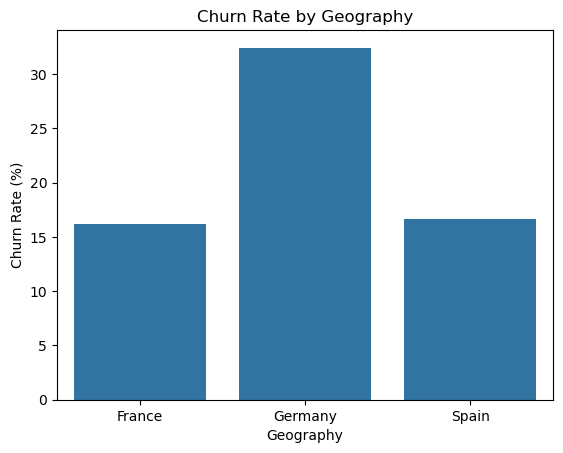

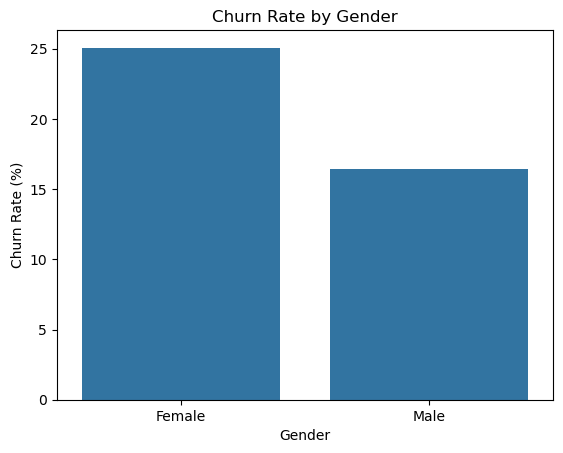

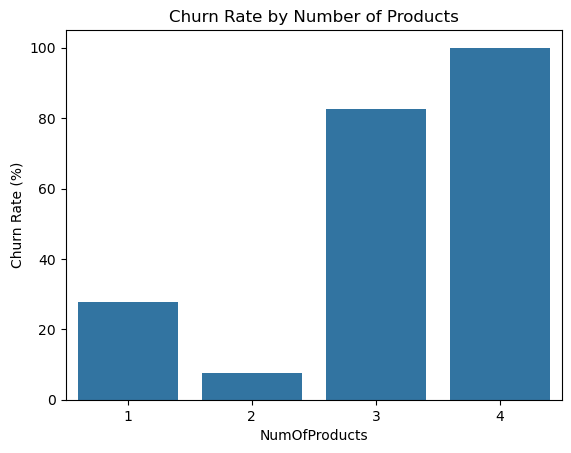

In [27]:
## 7. Visualizations

### Churn by Geography

geo_data = run_query("SELECT Geography, SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END)*100.0/COUNT(*) AS churn_rate FROM churn_data GROUP BY Geography")
sns.barplot(x='Geography', y='churn_rate', data=geo_data)
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate (%)')
plt.show()


### Churn by Gender

gender_data = run_query("SELECT Gender, SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END)*100.0/COUNT(*) AS churn_rate FROM churn_data GROUP BY Gender")
sns.barplot(x='Gender', y='churn_rate', data=gender_data)
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn by Number of Products

products_data = run_query("SELECT NumOfProducts, SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END)*100.0/COUNT(*) AS churn_rate FROM churn_data GROUP BY NumOfProducts")
sns.barplot(x='NumOfProducts', y='churn_rate', data=products_data)
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()



In [ ]:
## 8. Key Insights & Strategic Recommendations

What I Found:
- 20.37% churn rate is significant
- Germany has the highest churn (~32%)
- Female customers churn more (~25%) than males (~16%)
- Customers with 3+ products surprisingly have very high churn rates (up to 100%)
- Inactive members are almost twice as likely to leave

Business Actions:
1. Germany Focus: Launch loyalty and feedback campaigns in this region
2. Simplify Products: Investigate why high-product customers are leaving — too complex?
3. Re-Engage Inactive Users: Trigger campaigns when a user becomes inactive
4. Predict Churn: Build ML models to flag high-risk customers early
5. Monitor Impact: Even a 5% drop in churn can save substantial revenue

---

## 9. Conclusion (My Reflection)

This wasn’t just a technical project — it was a business story. I learned how to:
- Frame a real-world problem
- Use SQL and Python to investigate it
- Visualize and communicate patterns
- Think like a decision-maker when recommending solutions

As someone transitioning into the world of data and strategy, I feel confident that I can look at messy business problems and turn them into structured, data-backed solutions. This is the kind of mindset I aim to take into every opportunity I get.
